# FIDE & Google Efficient Chess AI Challenge

Welcome! This notebook will familiarize you with using competition's environment, creating an agent, and submitting your first chess bot!

In [4]:
# first let's make sure you have internet enabled
import requests
requests.get('http://www.google.com',timeout=10).ok

True

In [5]:
%%capture
# ensure we are on the latest version of kaggle-environments
!pip install --upgrade kaggle-environments

In [6]:
# Now let's set up the chess environment!
from kaggle_environments import make
env = make("chess", debug=True)

c:\Users\USER\Desktop\Supahotfile\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


termcolor not installed, skipping dependency
No pygame installed, ignoring import


### Testing your agent

Now let's see how your agent does againt the random agent!

Agent exit status/reward/time left: 
	 DONE / 1 / 10
	 DONE / 0 / 10





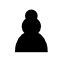
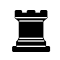
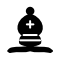
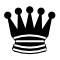
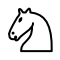
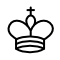
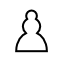
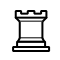
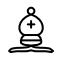
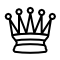
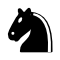
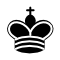

In [12]:
result = env.run(["main.py", "random"])
print("Agent exit status/reward/time left: ")
# look at the generated replay.json and print out the agent info
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")
# render the game
env.render(mode="ipython", width=640, height=640) 